# Load packages and data

In [100]:
setwd("/projects/ohlab/ruoyun/MECFS/train_model/MECFS")
pacman::p_load(Maaslin2, dplyr, ggplot2, stringr)

### Metadata - potential confounders

In [118]:
data = read.csv("all_tps/data/metadata/labels_all_082922.csv", header = T, row.names = 1)
data = data[,data['timepoints',] == 'tp1'] %>% t()
rownames(data) = data[,'sample_id_tp1']
data = data[,-which(colnames(data) %in% c("timepoints","sample_id_tp1","samples_id","age_group"))]
meta_data = data
meta_data[meta_data[,'race'] != '5.0','race'] = '0.0'

In [119]:
read_counts = readxl::read_excel("all_tps/data/metagenomics/sequence_data_info_072521.xlsx", 
                                 sheet = "timepoint1", col_names = TRUE) %>% as.data.frame()
rownames(read_counts) = read_counts$tube_id_in_tp1

### Microbiome and Metabolomics data

In [120]:
abun = read.csv("data/metagenomics/metaphlan3_specie_filtered_zscored_071020.csv", header = T, row.names = 1)
kegg = read.csv("data/metagenomics/kegg_gene_filtered_normalized_070220.txt", header = T, row.names = 1, sep = '\t')
bioc = read.csv("data/metabolomics/metabolomics_normalized_filtered_071020.csv", header = T, row.names = 1)
community = read.csv("data/metagenomics/metaphlan_community_index_070120.csv", header = T, row.names = 1)
diversity = read.csv("data/metagenomics/metaphlan_divergence_013021.csv", header = T, row.names = 1)
diversity = community[, c('chao1', 'evenness_evar', 'rarity_low_abundance', 'FB_ratio', 'dominance_gini')]
diversity[,'bray_divergence'] = divergence[,'study_ptorhc']
diversity = diversity %>% t() %>% as.data.frame()

In [121]:
samples = intersect(colnames(kegg)[grep('SAM', colnames(kegg))], colnames(bioc)[grep('SAM', colnames(bioc))])

In [122]:
meta_data = cbind(meta_data, read_counts[samples,'reads_clean'])
colnames(meta_data)[length(colnames(meta_data))] = 'reads_clean'
meta_data = meta_data[samples, ] %>% t() %>% as.data.frame()
levels = c('ID',rownames(meta_data))
meta_data['ID',] = colnames(meta_data)
meta_data = meta_data[levels, ] %>% t() %>% as.data.frame()

Warning message in cbind(meta_data, read_counts[samples, "reads_clean"]):
“number of rows of result is not a multiple of vector length (arg 2)”


In [124]:
abun = abun[, samples]
kegg = kegg[, samples]
bioc = bioc[, samples]
diversity = diversity[, samples]
rownames(abun) = paste('Specie_', str_split_fixed(rownames(abun), "\\|",2)[,2], sep = "")
rownames(kegg) = paste('Microbiome_gene_',rownames(kegg), sep = "")
rownames(bioc) = paste('Bioc_',rownames(bioc), sep = "") %>% str_replace('X - ', 'X_')
rownames(diversity) = paste('Diversity_',rownames(diversity), sep = "")

# combine all features for downstream analysis
data = rbind(diversity, abun, kegg, bioc)
levels = c('ID',rownames(data))
data['ID',] = colnames(data)
data = data[levels, ] %>% t() %>% as.data.frame()

microbiome = rbind(diversity, abun, kegg)
levels = c('ID',rownames(microbiome))
microbiome['ID',] = colnames(microbiome)
microbiome = microbiome[levels, ] %>% t() %>% as.data.frame()

# MaAsLin

### Write input for MaAsLin2, tab-delimited file

In [125]:
write.table(meta_data, "all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt",sep = "\t", quote = F, row.names = F)
write.table(data, "all_tps/data/metadata/maaslin/maaslin_data_082922.txt",sep = "\t",quote = F, row.names = F)
write.table(microbiome, "all_tps/data/metadata/maaslin/maaslin_microbiome_data_082922.txt",sep = "\t",quote = F, row.names = F)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-09-03 12:23:27 INFO::Writing function arguments to log file
2022-09-03 12:23:27 INFO::Verifying options selected are valid
2022-09-03 12:23:27 INFO::Determining format of input files
2022-09-03 12:23:27 INFO::Input format is data samples as rows and metadata samples as rows
2022-09-03 12:23:27 INFO::Formula for fixed effects: expr ~  age + gender + ethnic + race + IBS
2022-09-03 12:23:27 INFO::Filter data based on min abundance and min prevalence
2022-09-03 12:23:27 INFO::Total samples in data: 180
2022-09-03 12:23:27 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-09-03 12:23:27 INFO::Total filtered features: 89
2022-09-03 12:23:27 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inops, Specie_Phascolarctobact

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-09-03 12:23:30 INFO::Applying z-score to standardize continuous metadata
2022-09-03 12:23:30 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”


2022-09-03 12:23:38 INFO::Running selected analysis method: LM
2022-09-03 12:23:38 INFO::Fitting model to feature number 1, Diversity_chao1
2022-09-03 12:23:38 INFO::Fitting model to feature number 2, Diversity_evenness_evar
2022-09-03 12:23:38 INFO::Fitting model to feature number 3, Diversity_rarity_low_abundance
2022-09-03 12:23:38 INFO::Fitting model to feature number 4, Diversity_FB_ratio
2022-09-03 12:23:38 INFO::Fitting model to feature number 5, Diversity_dominance_gini
2022-09-03 12:23:38 INFO::Fitting model to feature number 6, Diversity_bray_divergence
2022-09-03 12:23:38 INFO::Fitting model to feature number 7, Specie_Bacteroides_vulgatus
2022-09-03 12:23:38 INFO::Fitting model to feature number 8, Specie_Bacteroides_uniformis
2022-09-03 12:23:38 INFO::Fitting model to feature number 9, Specie_Bacteroides_stercoris
2022-09-03 12:23:38 INFO::Fitting model to feature number 10, Specie_Prevotella_copri
2022-09-03 12:23:38 INFO::Fitting model to feature number 11, Specie_Bacter

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


2022-09-03 12:24:12 INFO::Writing association plots (one for each significant association) to output folder: /projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/demographic
2022-09-03 12:24:12 INFO::Plotting associations from most to least significant, grouped by metadata
2022-09-03 12:24:12 INFO::Plotting data for metadata number 1, gender
2022-09-03 12:24:12 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3alpha.17beta.diol.monosulfate..2.
2022-09-03 12:24:12 INFO::Creating boxplot for categorical data, gender vs Bioc_2S.3R.dihydroxybutyrate
2022-09-03 12:24:12 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3alpha.17beta.diol.disulfate
2022-09-03 12:24:13 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3beta.17beta.diol.disulfate
2022-09-03 12:24:13 INFO::Creating boxplot for categorical data, gender vs Bioc_urate
2022-09-03 12:24:13 INFO::Creating boxplot for categorical 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_S.adenosylhomocysteine..SAH.


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_X_11261


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_N6.succinyladenosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_kynurenine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_tyrosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_quinolinate


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:18 INFO::Creating scatter plot for continuous data, IBS vs Bioc_2.O.methylascorbic.acid


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_eugenol.sulfate


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_X_24309


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Specie_Eubacterium_rectale


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_5.6.dihydrouridine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_5.methylthioadenosine..MTA.


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_N.formylmethionine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:19 INFO::Creating scatter plot for continuous data, IBS vs Bioc_X_23680


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Bioc_cys.gly..oxidized


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Bioc_N1.methylinosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Bioc_phosphocholine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Microbiome_gene_K17103


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Bioc_2.piperidinone


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Microbiome_gene_K01579


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:20 INFO::Creating scatter plot for continuous data, IBS vs Bioc_gamma.glutamyltyrosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-09-03 12:24:21 INFO::Creating scatter plot for continuous data, IBS vs Specie_Coprococcus_comes


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing miss

2022-09-03 12:24:23 INFO::Plotting data for metadata number 3, age
2022-09-03 12:24:23 INFO::Creating scatter plot for continuous data, age vs Bioc_X_15503


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:23 INFO::Creating scatter plot for continuous data, age vs Bioc_X_15461


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:23 INFO::Creating scatter plot for continuous data, age vs Bioc_hydroxyasparagine


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:23 INFO::Creating scatter plot for continuous data, age vs Bioc_arabitol.xylitol


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:23 INFO::Creating scatter plot for continuous data, age vs Bioc_guanidinosuccinate


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_quinolinate


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_pregnenediol.sulfate..C21H34O5S..


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_X_13553


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Microbiome_gene_K00605


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_1.methyl.4.imidazoleacetate


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_X_16580


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:24 INFO::Creating scatter plot for continuous data, age vs Bioc_mannonate.


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:25 INFO::Creating scatter plot for continuous data, age vs Bioc_3.methylglutaconate


`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:25 INFO::Creating scatter plot for continuous data, age vs Bioc_X_25519


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



2022-09-03 12:24:27 INFO::Plotting data for metadata number 4, race
2022-09-03 12:24:27 INFO::Creating boxplot for categorical data, race vs Bioc_X_24970
2022-09-03 12:24:27 INFO::Creating boxplot for categorical data, race vs Microbiome_gene_K00605
2022-09-03 12:24:27 INFO::Creating boxplot for categorical data, race vs Bioc_X_17685


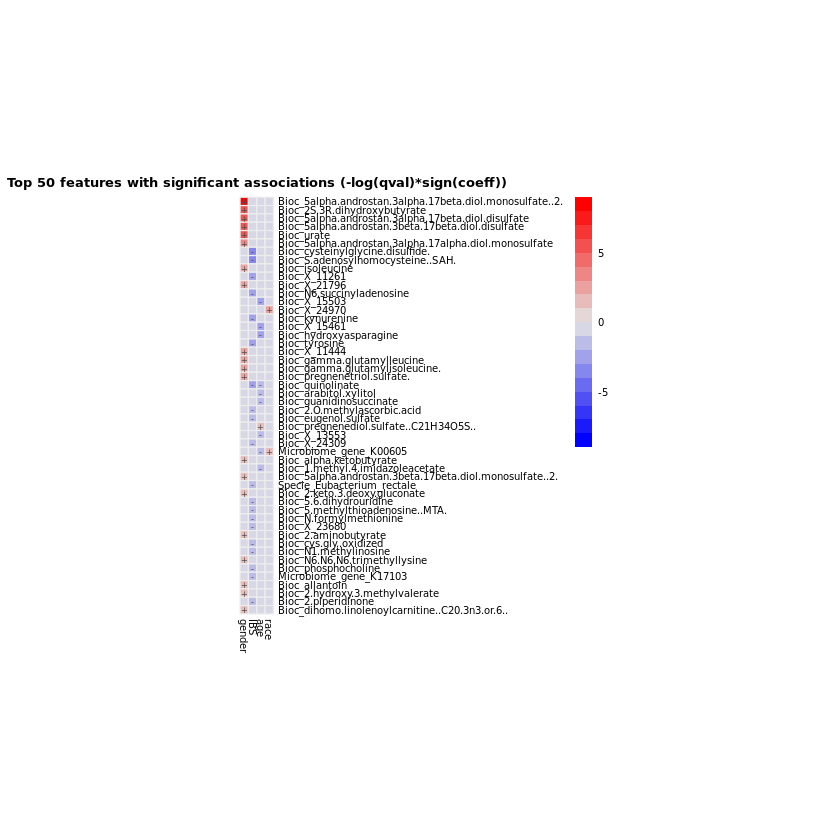

In [126]:
demographic = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/demographic", 
    fixed_effects = c('age','gender','ethnic','race','IBS')
)

In [127]:
diet = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/diet", 
    fixed_effects = c('diet_meat','diet_sugar','diet_veg','diet_grains','diet_fruit')
)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-09-03 12:24:55 INFO::Writing function arguments to log file
2022-09-03 12:24:55 INFO::Verifying options selected are valid
2022-09-03 12:24:55 INFO::Determining format of input files
2022-09-03 12:24:55 INFO::Input format is data samples as rows and metadata samples as rows
2022-09-03 12:24:55 INFO::Formula for fixed effects: expr ~  diet_meat + diet_sugar + diet_veg + diet_grains + diet_fruit
2022-09-03 12:24:55 INFO::Filter data based on min abundance and min prevalence
2022-09-03 12:24:55 INFO::Total samples in data: 180
2022-09-03 12:24:55 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-09-03 12:24:55 INFO::Total filtered features: 89
2022-09-03 12:24:55 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inop

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-09-03 12:24:56 INFO::Applying z-score to standardize continuous metadata
2022-09-03 12:24:56 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”


2022-09-03 12:25:03 INFO::Running selected analysis method: LM
2022-09-03 12:25:03 INFO::Fitting model to feature number 1, Diversity_chao1
2022-09-03 12:25:03 INFO::Fitting model to feature number 2, Diversity_evenness_evar
2022-09-03 12:25:03 INFO::Fitting model to feature number 3, Diversity_rarity_low_abundance
2022-09-03 12:25:03 INFO::Fitting model to feature number 4, Diversity_FB_ratio
2022-09-03 12:25:03 INFO::Fitting model to feature number 5, Diversity_dominance_gini
2022-09-03 12:25:03 INFO::Fitting model to feature number 6, Diversity_bray_divergence
2022-09-03 12:25:03 INFO::Fitting model to feature number 7, Specie_Bacteroides_vulgatus
2022-09-03 12:25:03 INFO::Fitting model to feature number 8, Specie_Bacteroides_uniformis
2022-09-03 12:25:03 INFO::Fitting model to feature number 9, Specie_Bacteroides_stercoris
2022-09-03 12:25:03 INFO::Fitting model to feature number 10, Specie_Prevotella_copri
2022-09-03 12:25:03 INFO::Fitting model to feature number 11, Specie_Bacter

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”


In [128]:
medication = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/medication", 
    fixed_effects = c('antifungals','antibiotics','probiotics','antivirals')
)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-09-03 12:25:36 INFO::Writing function arguments to log file
2022-09-03 12:25:36 INFO::Verifying options selected are valid
2022-09-03 12:25:36 INFO::Determining format of input files
2022-09-03 12:25:36 INFO::Input format is data samples as rows and metadata samples as rows
2022-09-03 12:25:36 INFO::Formula for fixed effects: expr ~  antifungals + antibiotics + probiotics + antivirals
2022-09-03 12:25:36 INFO::Filter data based on min abundance and min prevalence
2022-09-03 12:25:36 INFO::Total samples in data: 180
2022-09-03 12:25:36 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-09-03 12:25:36 INFO::Total filtered features: 89
2022-09-03 12:25:36 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inops, Specie

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-09-03 12:25:36 INFO::Applying z-score to standardize continuous metadata
2022-09-03 12:25:36 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”


2022-09-03 12:25:45 INFO::Running selected analysis method: LM
2022-09-03 12:25:45 INFO::Fitting model to feature number 1, Diversity_chao1
2022-09-03 12:25:45 INFO::Fitting model to feature number 2, Diversity_evenness_evar
2022-09-03 12:25:45 INFO::Fitting model to feature number 3, Diversity_rarity_low_abundance
2022-09-03 12:25:45 INFO::Fitting model to feature number 4, Diversity_FB_ratio
2022-09-03 12:25:45 INFO::Fitting model to feature number 5, Diversity_dominance_gini
2022-09-03 12:25:45 INFO::Fitting model to feature number 6, Diversity_bray_divergence
2022-09-03 12:25:45 INFO::Fitting model to feature number 7, Specie_Bacteroides_vulgatus
2022-09-03 12:25:45 INFO::Fitting model to feature number 8, Specie_Bacteroides_uniformis
2022-09-03 12:25:45 INFO::Fitting model to feature number 9, Specie_Bacteroides_stercoris
2022-09-03 12:25:45 INFO::Fitting model to feature number 10, Specie_Prevotella_copri
2022-09-03 12:25:45 INFO::Fitting model to feature number 11, Specie_Bacter

2022-09-03 12:26:13 INFO::Creating boxplot for categorical data, antivirals vs Bioc_X_12851


In [129]:
reads_count = medication = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_microbiome_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/reads_count", 
    fixed_effects = c('reads_clean')
)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-09-03 12:26:14 INFO::Writing function arguments to log file
2022-09-03 12:26:14 INFO::Verifying options selected are valid
2022-09-03 12:26:14 INFO::Determining format of input files
2022-09-03 12:26:14 INFO::Input format is data samples as rows and metadata samples as rows
2022-09-03 12:26:14 INFO::Formula for fixed effects: expr ~  reads_clean
2022-09-03 12:26:14 INFO::Filter data based on min abundance and min prevalence
2022-09-03 12:26:14 INFO::Total samples in data: 180
2022-09-03 12:26:14 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-09-03 12:26:14 INFO::Total filtered features: 54
2022-09-03 12:26:14 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inops, Specie_Phascolarctobacterium_succinatutens, Sp

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-09-03 12:26:14 INFO::Applying z-score to standardize continuous metadata
2022-09-03 12:26:14 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

2022-09-03 12:26:20 INFO::Running selected analysis method: LM
2022-09-03 12:26:20 INFO::Fitting model to feature number 1, Diversity_chao1
2022-09-03 12:26:20 INFO::Fitting model to feature number 2, Diversity_evenness_evar
2022-09-03 12:26:20 INFO::Fitting model to feature number 3, Diversity_rarity_low_abundance
2022-09-03 12:26:20 INFO::Fitting model to feature number 4, Diversity_FB_ratio
2022-09-03 12:26:20 INFO::Fitting model to feature number 5, Diversity_dominance_gini
2022-09-03 12:26:20 INFO::Fitting model to feature number 6, Diversity_bray_divergence
2022-09-03 12:26:20 INFO::Fitting model to feature number 7, Specie_Bacteroides_vulgatus
2022-09-03 12:26:20 INFO::Fitting model to feature number 8, Specie_Bacteroides_uniformis
2022-09-03 12:26:20 INFO::Fitting model to feature number 9, Specie_Bacteroides_stercoris
2022-09-03 12:26:20 INFO::Fitting model to feature number 10, Specie_Prevotella_copri
2022-09-03 12:26:20 INFO::Fitting model to feature number 11, Specie_Bacter